In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data with the updated path
df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Coding\CodSoft_Internship\Churn_Modelling.csv")

# Display the first few rows of the dataframe
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [3]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
# dropping unnecessary columns
drop_cols = ['CustomerId','Surname','RowNumber']
df.drop(drop_cols, axis=1, inplace=True)
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [9]:
print(df['Geography'].unique())
df['Geography'].value_counts()

['France' 'Spain' 'Germany']


Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [10]:
print(df['Exited'].value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64


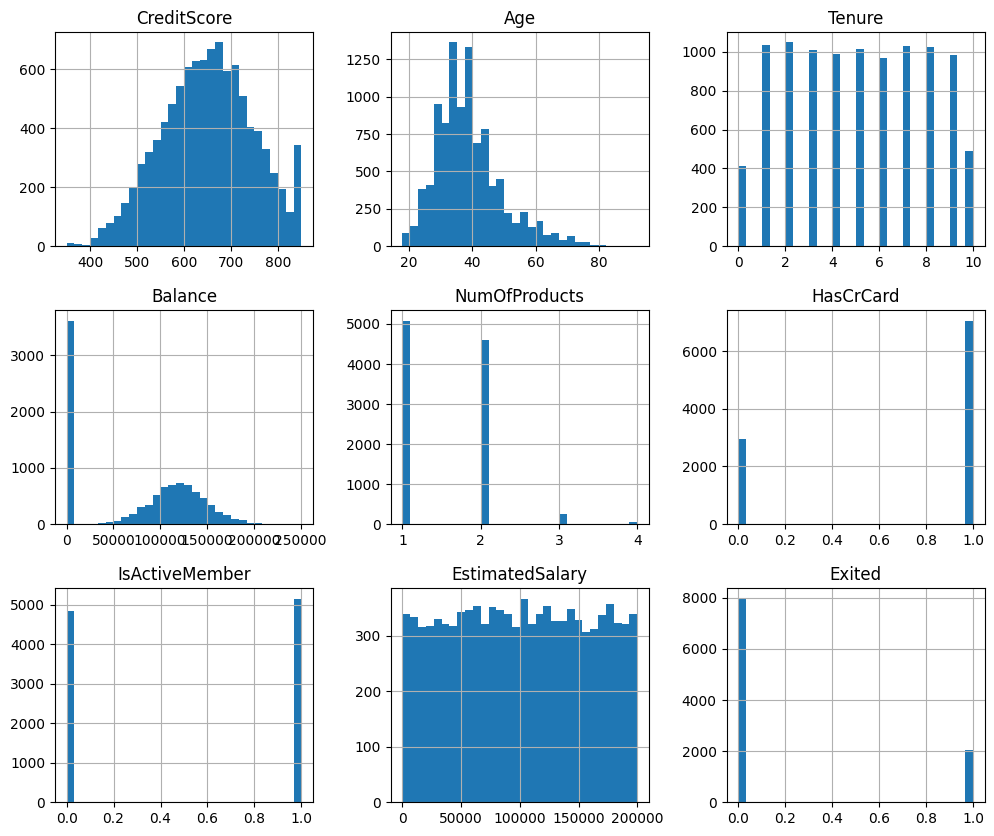

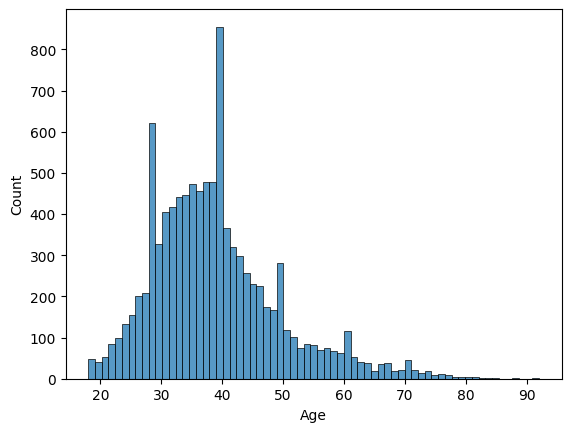

In [11]:
df.hist(figsize=(12, 10), bins=30)
plt.show()

# Alternatively, for a specific feature
sns.histplot(df['Age'])
plt.show()

In [15]:
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

In [18]:
print(df.columns)

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_Germany', 'Geography_Spain'],
      dtype='object')


In [22]:
df.columns = df.columns.str.strip()  # Remove any leading or trailing spaces

Columns in DataFrame: Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2         

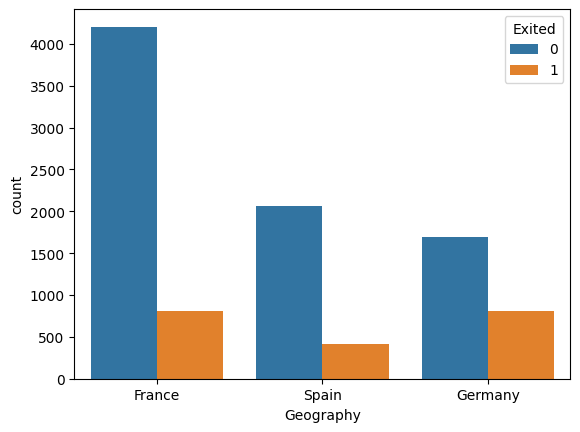

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\Coding\CodSoft_Internship\Churn_Modelling.csv")

# Print column names
print("Columns in DataFrame:", df.columns)

# Print the first few rows
print(df.head())

# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Print unique values in 'Geography'
print("Unique values in 'Geography':", df['Geography'].unique())

# Plot
sns.countplot(x='Geography', hue='Exited', data=df)
plt.show()

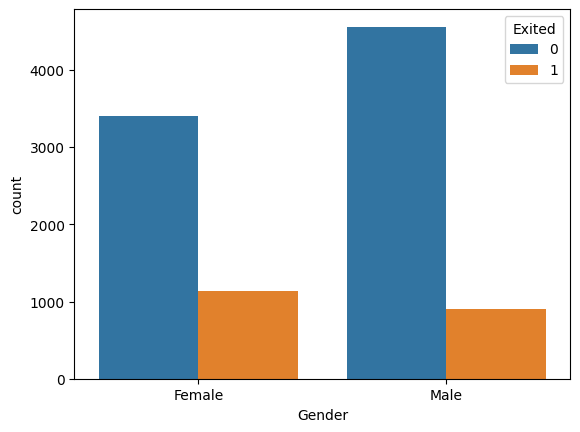

In [25]:
sns.countplot(x='Gender',hue='Exited',data=df)
plt.show()


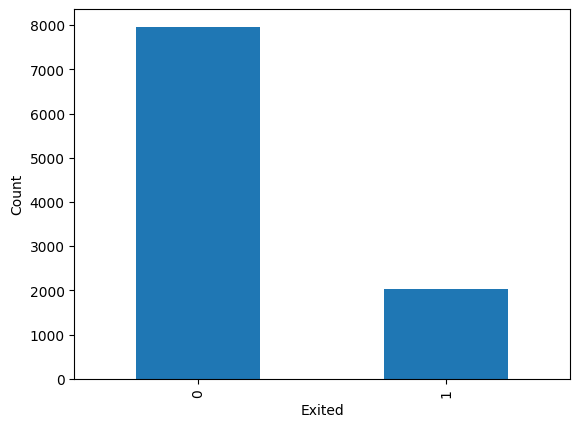

In [26]:
df['Exited'].value_counts().plot(kind='bar')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

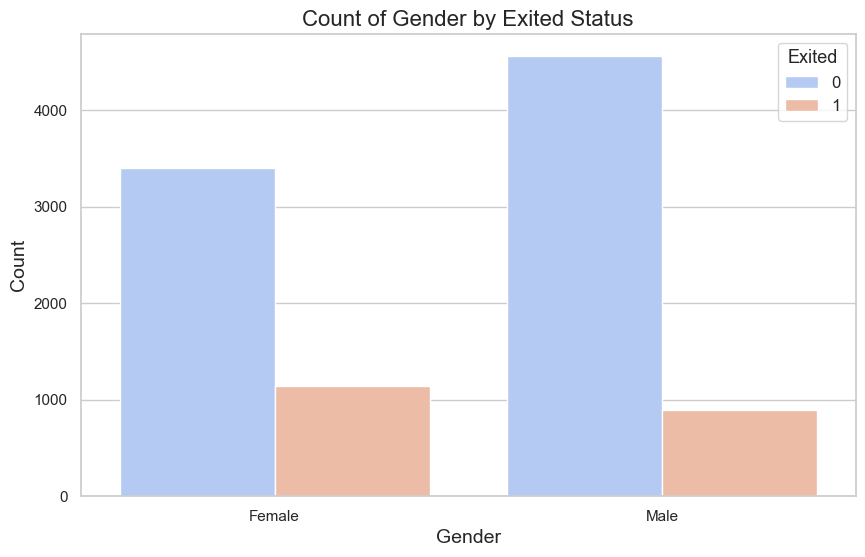

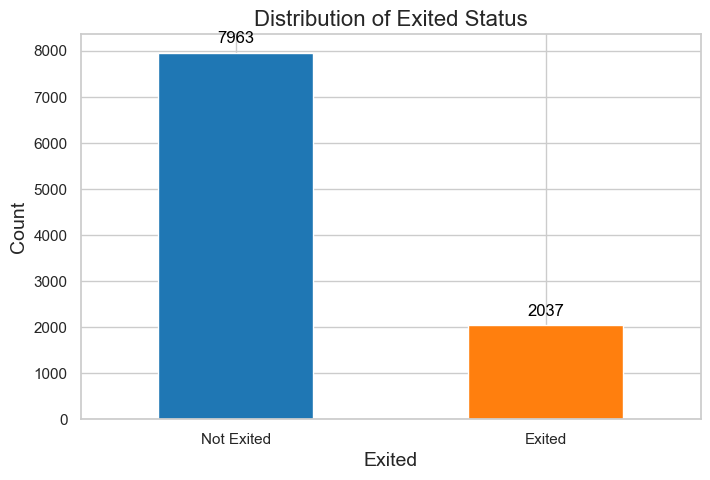

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style='whitegrid')

# Enhanced countplot for 'Gender' with 'Exited'
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Exited', data=df, palette='coolwarm')
plt.title('Count of Gender by Exited Status', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Exited', title_fontsize='13', fontsize='12')
plt.show()

# Enhanced bar plot for 'Exited' value counts
plt.figure(figsize=(8, 5))
ax = df['Exited'].value_counts().plot(kind='bar', color=['#1f77b4', '#ff7f0e'])
plt.title('Distribution of Exited Status', fontsize=16)
plt.xlabel('Exited', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Not Exited', 'Exited'], rotation=0)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', 
                fontsize=12, color='black')
plt.show()

In [28]:
df = pd.get_dummies(df, columns=['Gender','Geography'])
order = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Gender_Female',
       'Gender_Male', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Exited']
df = df[order]
df.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Gender_Female  Gender_Male  \
0               1        101348.88           True        False   
1               1        112542.58           True        False   
2               0        113931.57           True        False   
3               0         93826.63           True        False   
4               1         79084.10           True        False   

   Geography_France  Geography_Germany  Geography_Spain  Exited  
0              True              False            False       1  
1             False              False             True       0  
2              True              False            False       1  
3              True              False            False       0  
4             False              False             True       0

In [29]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [30]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [31]:
print(X.shape)
y.shape

(10000, 13)


(10000,)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [33]:
lg = LogisticRegression()
rf = RandomForestClassifier(n_estimators=50, random_state=2)
gb = GradientBoostingClassifier(n_estimators=50,random_state=2)

In [34]:
clfs = {
    'lg':lg,
    'rf':rf,
    'gb':gb
}

In [35]:
def train_clfs_and_predict(clfs,X_train,X_test,y_train,y_test):
    acc = []
    prec = []
    conf_mat = []

    for clf in clfs:
        model = clfs[clf]
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        acc.append(accuracy_score(y_test,y_pred))
        prec.append(precision_score(y_test,y_pred))
        conf_mat.append(confusion_matrix(y_test,y_pred))

    return acc, prec, conf_mat

In [36]:
accuracy, precision, conf_mat = train_clfs_and_predict(clfs,X_train,X_test,y_train,y_test)

In [37]:
performance = {
    'classifiers':list(clfs.keys()),
    'accuracy':accuracy,
    'precision':precision,
    'confusion_matrix':conf_mat,
}

In [38]:
perf_df = pd.DataFrame(performance).sort_values(by='accuracy',ascending=False)
perf_df.head()

classifiers  accuracy  precision          confusion_matrix
2          gb    0.8650   0.786802  [[1575, 42], [228, 155]]
1          rf    0.8550   0.714286  [[1555, 62], [228, 155]]
0          lg    0.8155   0.555556   [[1561, 56], [313, 70]]

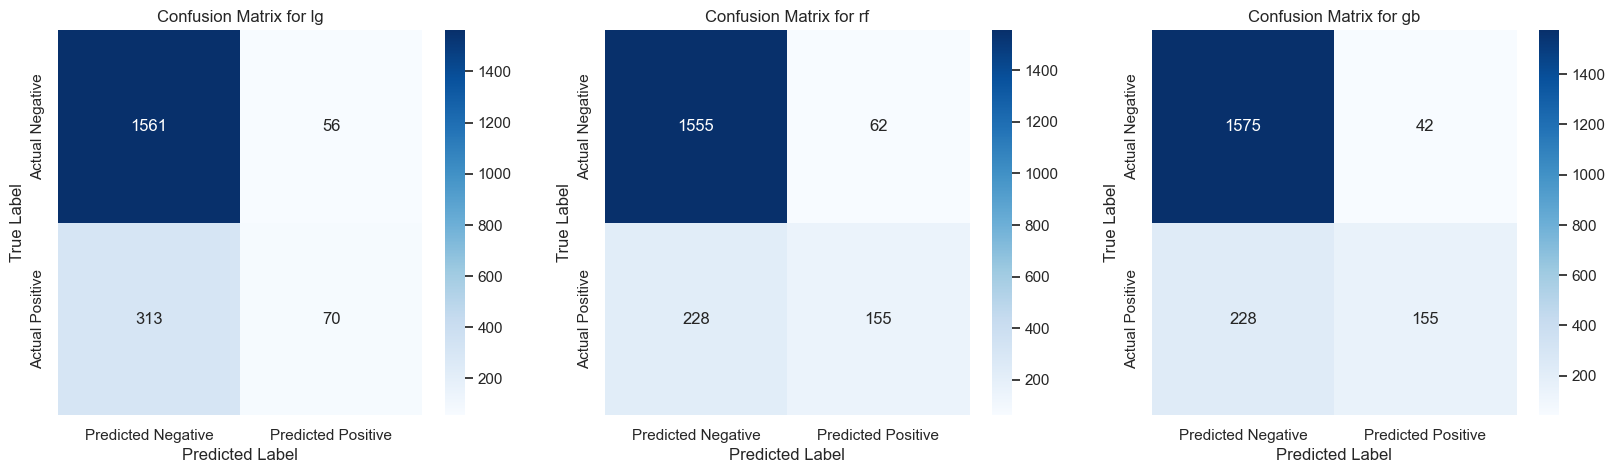

In [39]:
# Plotting confusion matrices of classifiers
num_classifiers = len(conf_mat)

fig, axes = plt.subplots(1, num_classifiers, figsize=(20, 5))  # Adjusting figsize 

for i, (matrix, classifier) in enumerate(zip(conf_mat, list(clfs.keys()))):
    sns.set(font_scale=1)  # Adjusting the font size 
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Predicted Negative", "Predicted Positive"],
                yticklabels=["Actual Negative", "Actual Positive"],
                ax=axes[i])
    axes[i].set_title(f"Confusion Matrix for {classifier}")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

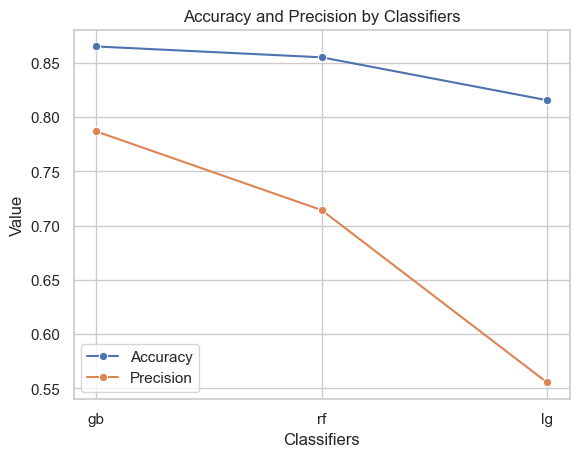

In [40]:
sns.set(style="whitegrid")
sns.lineplot(x=perf_df.classifiers, y=perf_df.accuracy, marker='o', label='Accuracy', data=perf_df)
sns.lineplot(x=perf_df.classifiers, y=perf_df.precision, marker='o', label='Precision', data=perf_df)

plt.title("Accuracy and Precision by Classifiers")
plt.xlabel("Classifiers")
plt.ylabel("Value")
plt.legend()
plt.show()

In [41]:
from sklearn.model_selection import cross_val_score

def evaluate_with_cv(clfs, X, y):
    cv_results = {'Classifier': [], 'Mean Accuracy': [], 'Std Accuracy': []}
    
    for name, clf in clfs.items():
        scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
        cv_results['Classifier'].append(name)
        cv_results['Mean Accuracy'].append(scores.mean())
        cv_results['Std Accuracy'].append(scores.std())
    
    cv_df = pd.DataFrame(cv_results)
    return cv_df

cv_results_df = evaluate_with_cv(clfs, X, y)
cv_results_df.sort_values(by='Mean Accuracy', ascending=False, inplace=True)
cv_results_df

Classifier  Mean Accuracy  Std Accuracy
2         gb         0.8622      0.007264
1         rf         0.8602      0.006668
0         lg         0.8096      0.005152

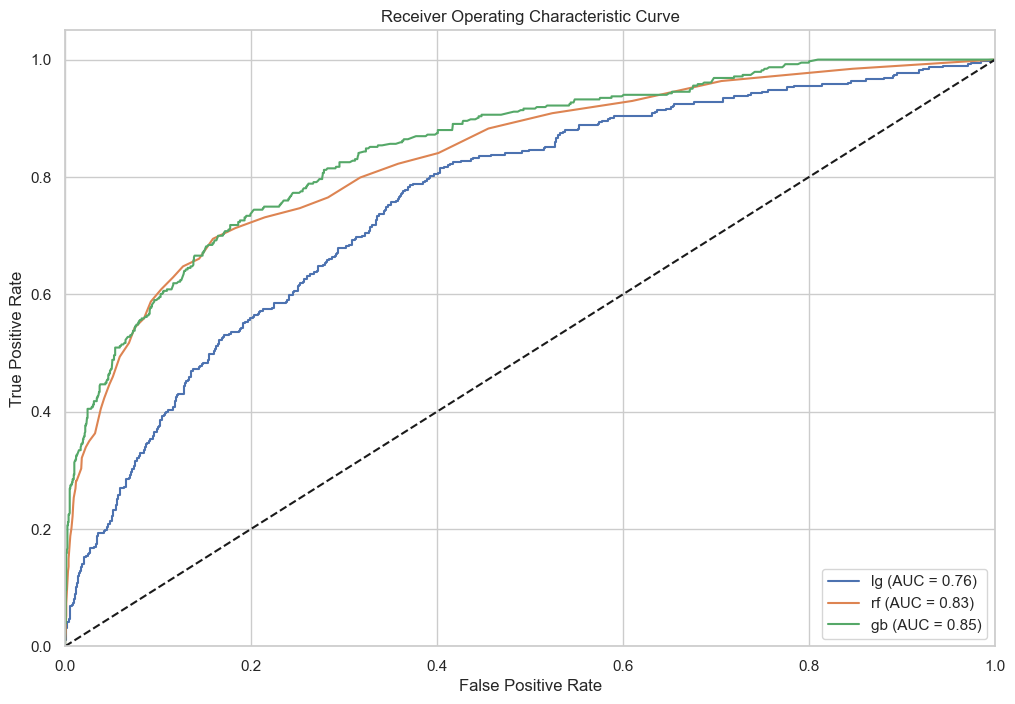

In [42]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(clfs, X_test, y_test):
    plt.figure(figsize=(12, 8))
    
    for name, clf in clfs.items():
        y_proba = clf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc='lower right')
    plt.show()

plot_roc_curves(clfs, X_test, y_test)

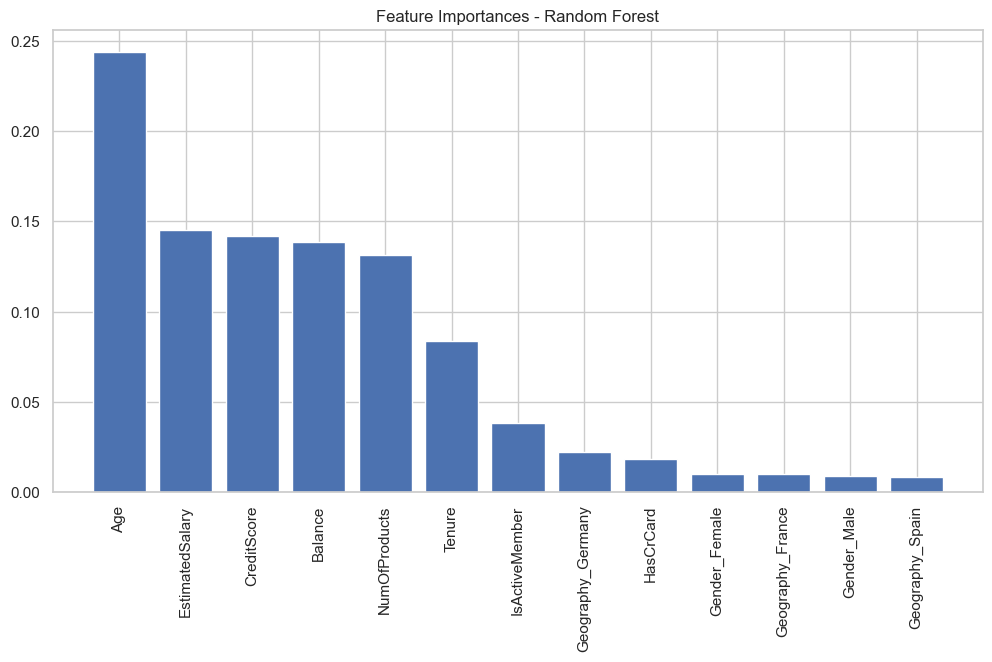

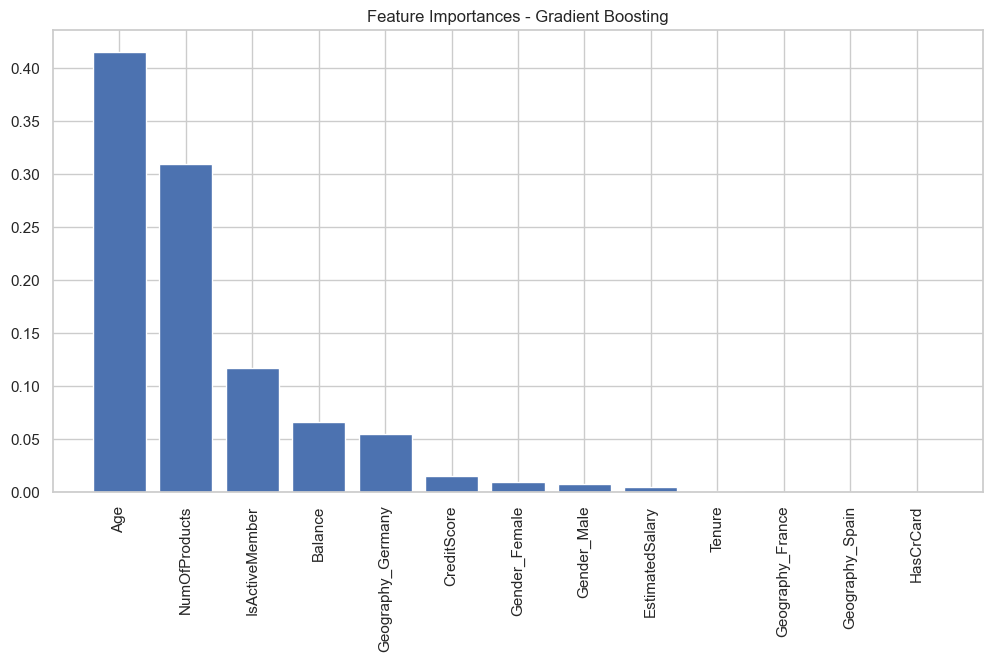

In [43]:
def plot_feature_importances(clf, X, model_name):
    importances = clf.feature_importances_
    indices = importances.argsort()[::-1]
    features = X.columns
    
    plt.figure(figsize=(12, 6))
    plt.title(f'Feature Importances - {model_name}')
    plt.bar(range(X.shape[1]), importances[indices], align='center')
    plt.xticks(range(X.shape[1]), features[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()

# Plot feature importances for Random Forest
plot_feature_importances(rf, pd.DataFrame(X, columns=df.columns[:-1]), 'Random Forest')

# Plot feature importances for Gradient Boosting
plot_feature_importances(gb, pd.DataFrame(X, columns=df.columns[:-1]), 'Gradient Boosting')

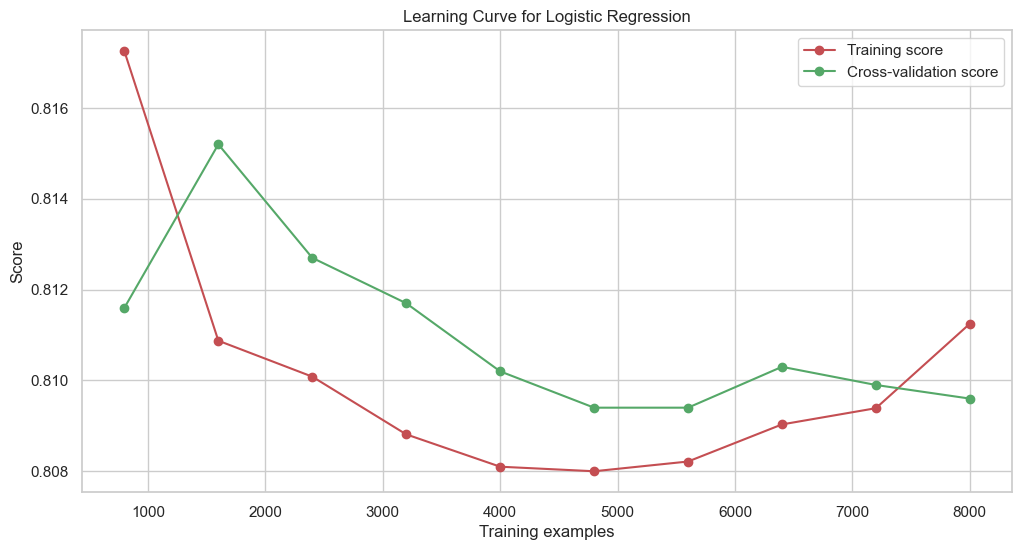

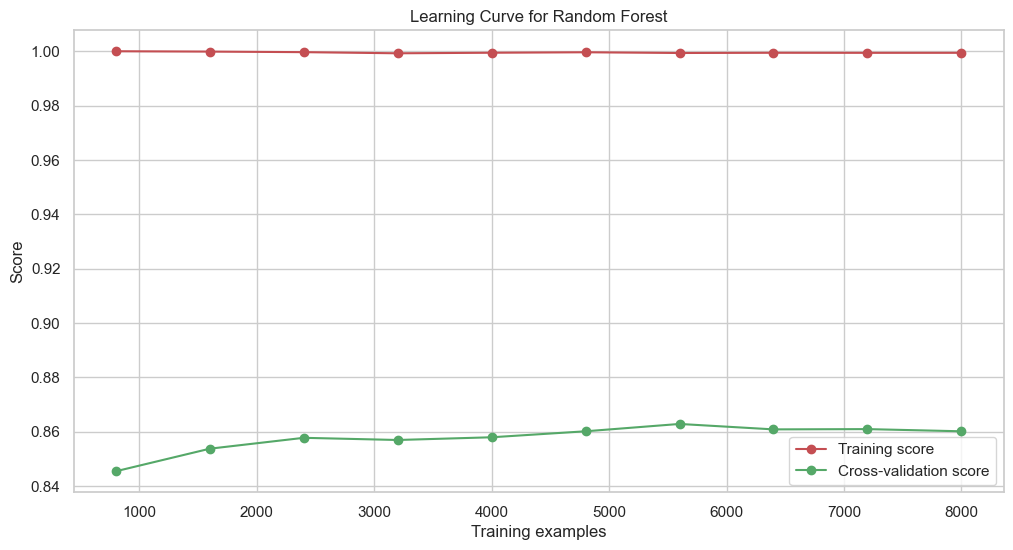

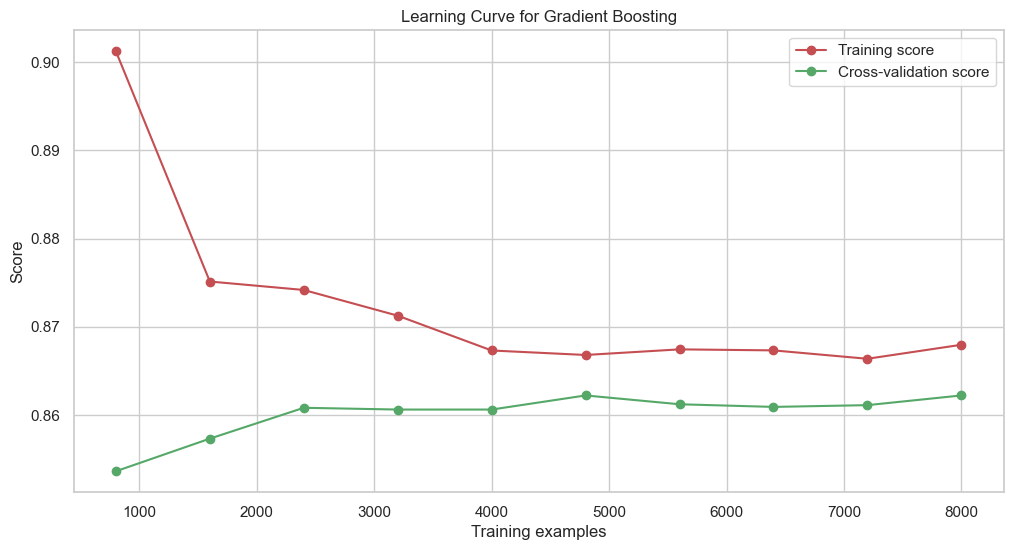

In [44]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(clf, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(clf, X, y, cv=5, n_jobs=-1,
                                                            train_sizes=np.linspace(0.1, 1.0, 10))
    
    plt.figure(figsize=(12, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Cross-validation score')
    
    plt.title(title)
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Learning curves for Logistic Regression
plot_learning_curve(lg, X, y, 'Learning Curve for Logistic Regression')

# Learning curves for Random Forest
plot_learning_curve(rf, X, y, 'Learning Curve for Random Forest')

# Learning curves for Gradient Boosting
plot_learning_curve(gb, X, y, 'Learning Curve for Gradient Boosting')

In [45]:
from sklearn.model_selection import GridSearchCV

# Example for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=2), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters found:  {'max_depth': 10, 'n_estimators': 50}
Best cross-validation score: 0.86


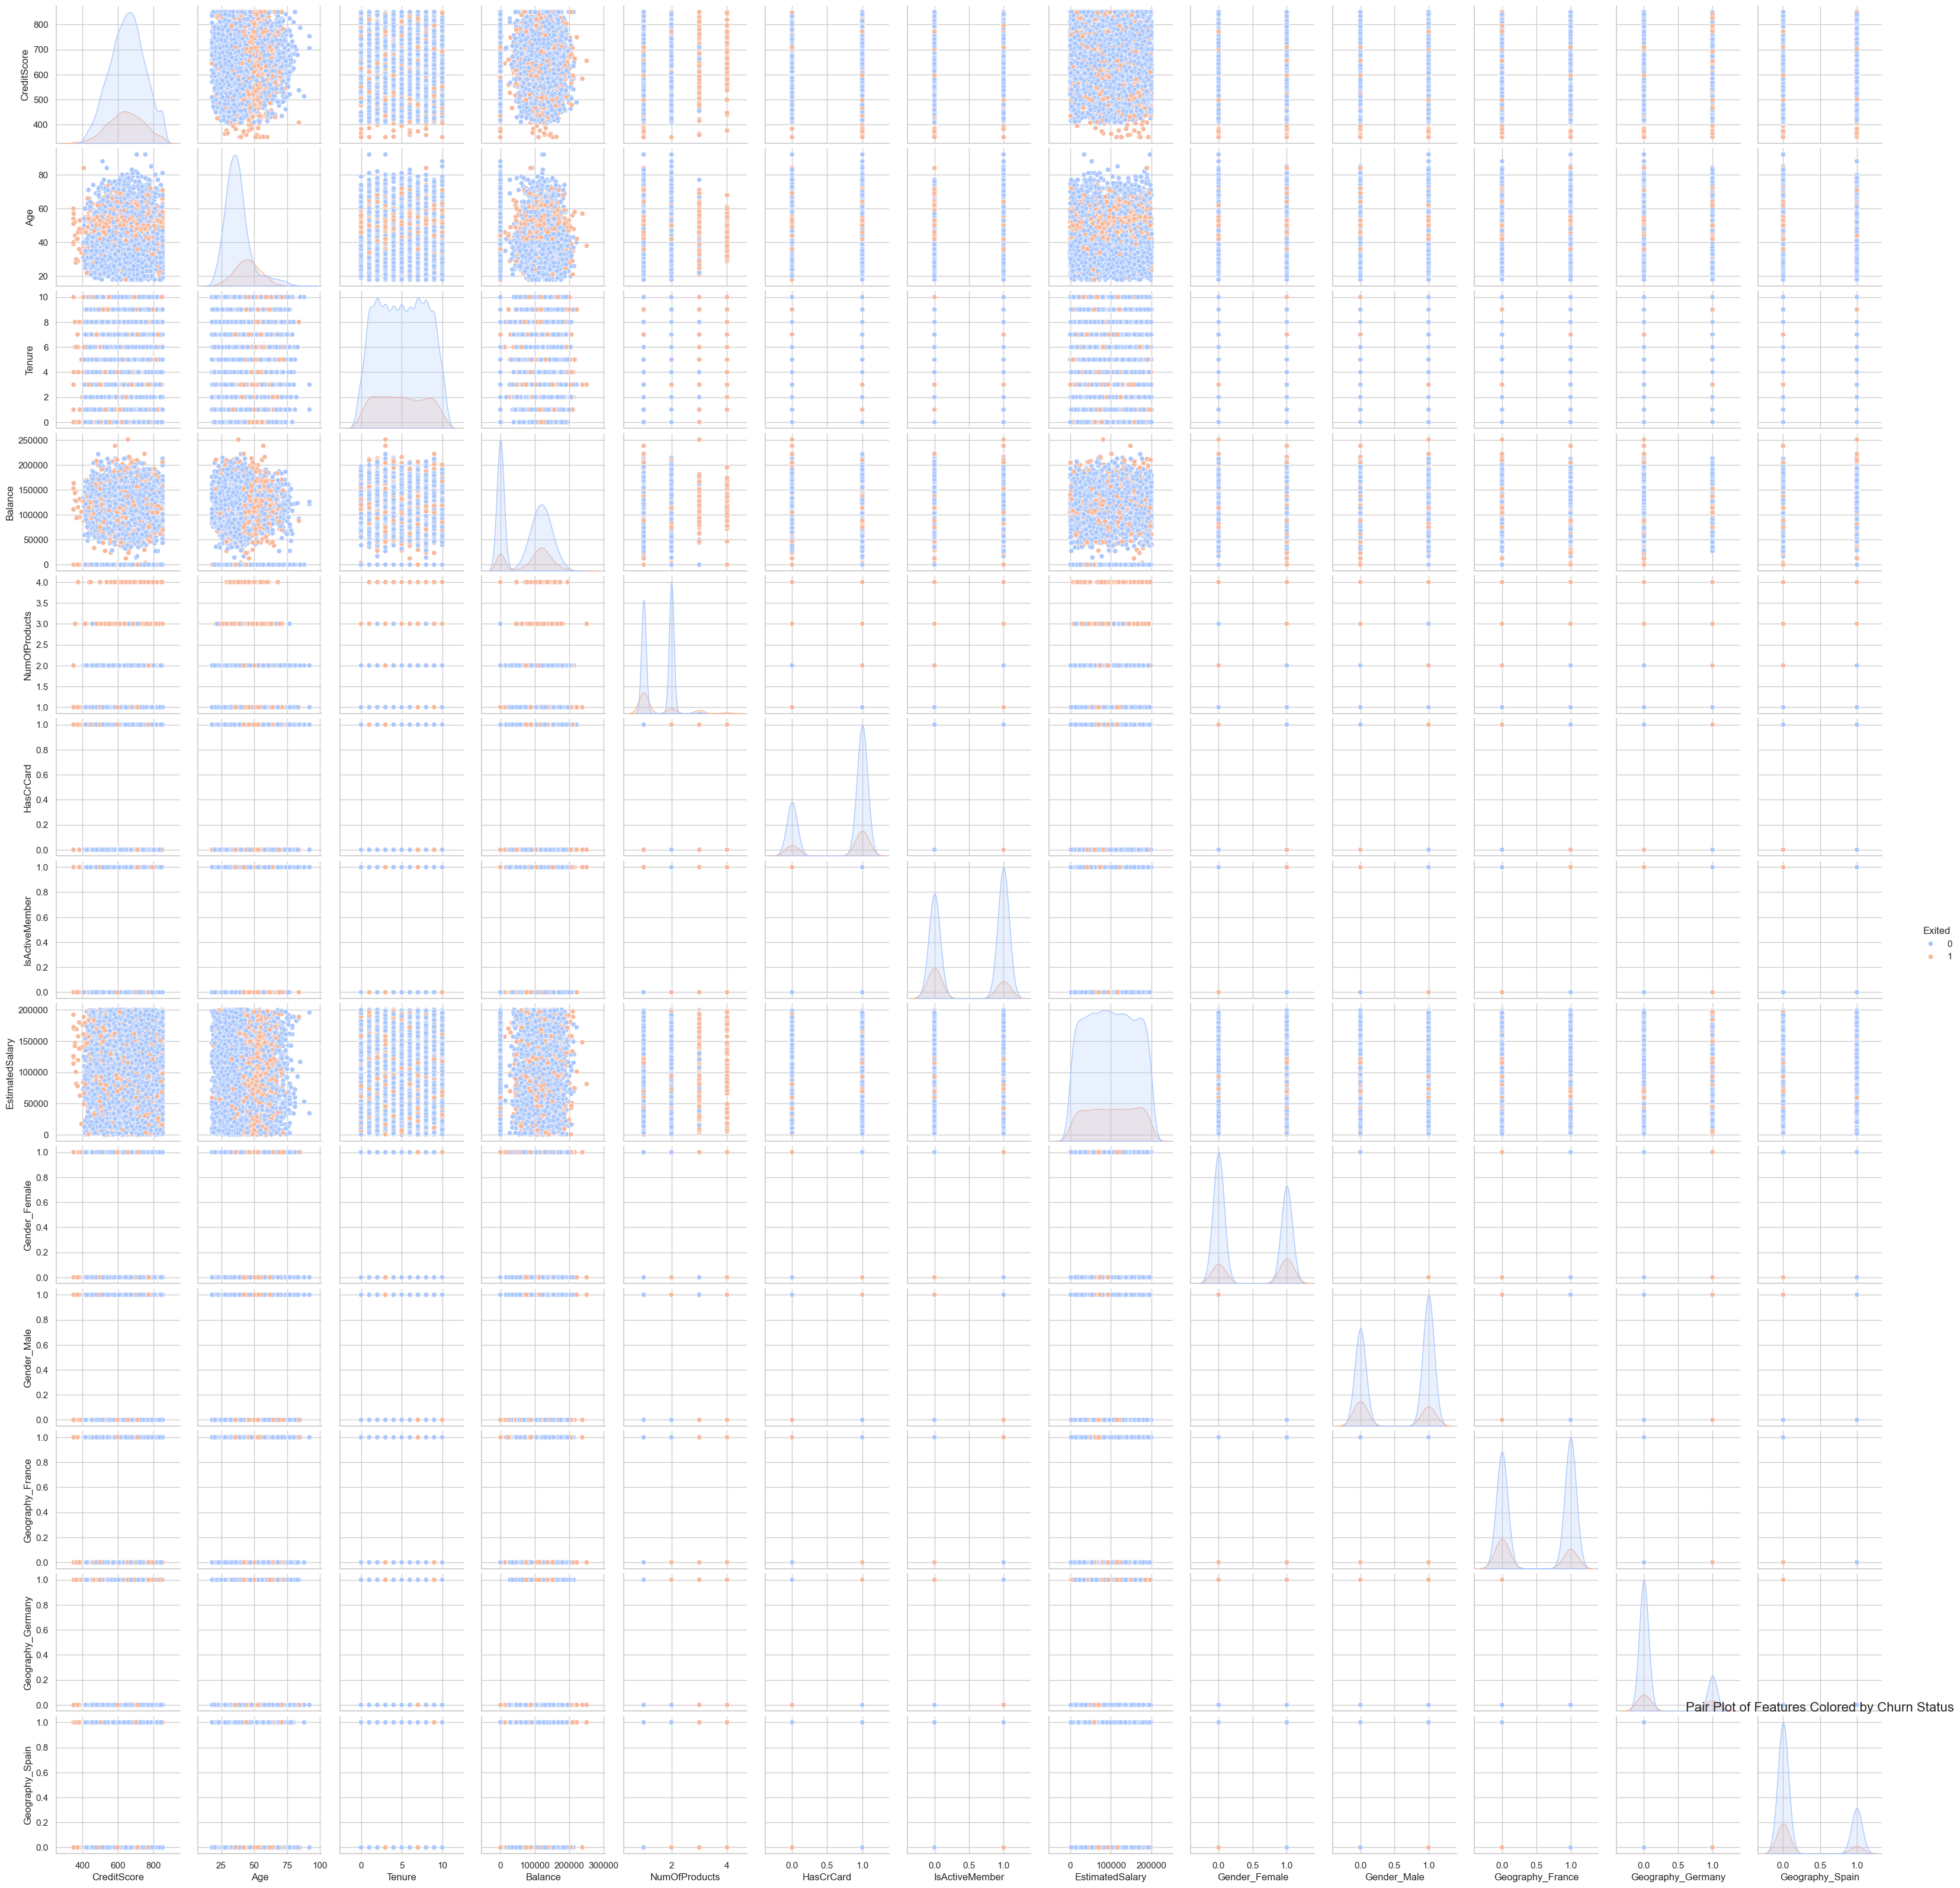

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Exited' is included in the DataFrame for visualization purposes
df_plot = df.copy()
df_plot['Exited'] = df['Exited']  # Add 'Exited' back for color coding

sns.pairplot(df_plot, hue='Exited', palette='coolwarm', diag_kind='kde')
plt.title('Pair Plot of Features Colored by Churn Status', fontsize=16)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_19404\2929945075.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Exited', y=feature, data=df, palette='coolwarm')


<Figure size 1200x800 with 0 Axes>

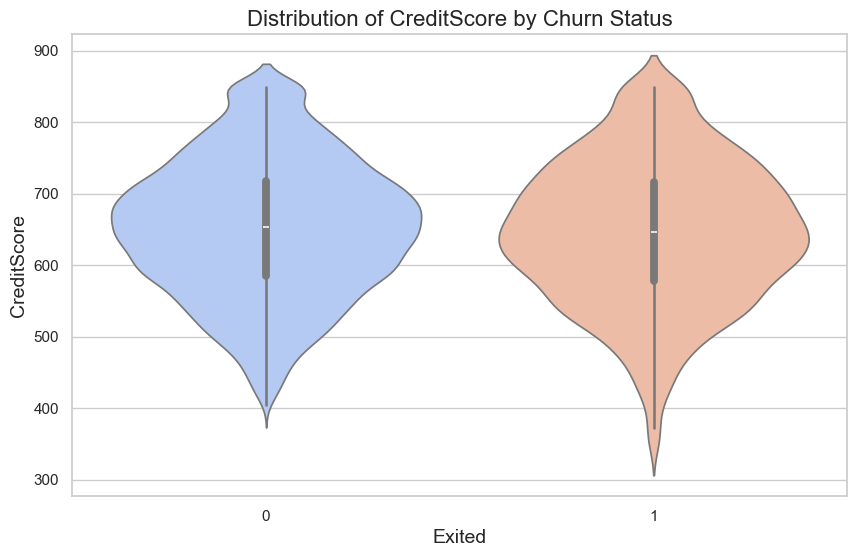

C:\Users\DELL\AppData\Local\Temp\ipykernel_19404\2929945075.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Exited', y=feature, data=df, palette='coolwarm')


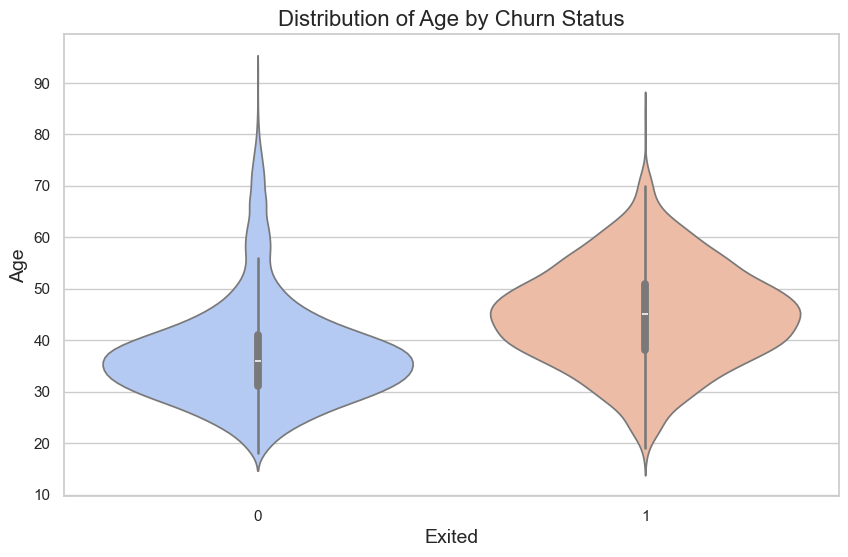

C:\Users\DELL\AppData\Local\Temp\ipykernel_19404\2929945075.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Exited', y=feature, data=df, palette='coolwarm')


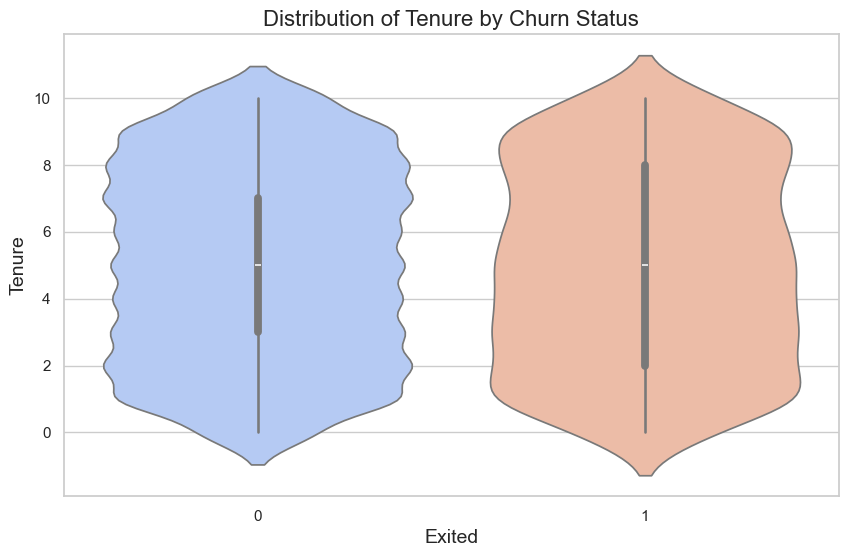

C:\Users\DELL\AppData\Local\Temp\ipykernel_19404\2929945075.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Exited', y=feature, data=df, palette='coolwarm')


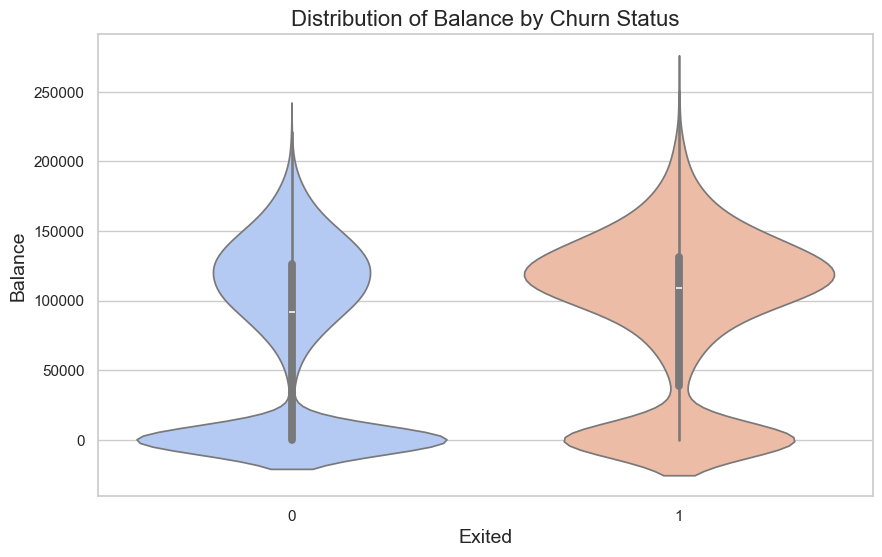

C:\Users\DELL\AppData\Local\Temp\ipykernel_19404\2929945075.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Exited', y=feature, data=df, palette='coolwarm')


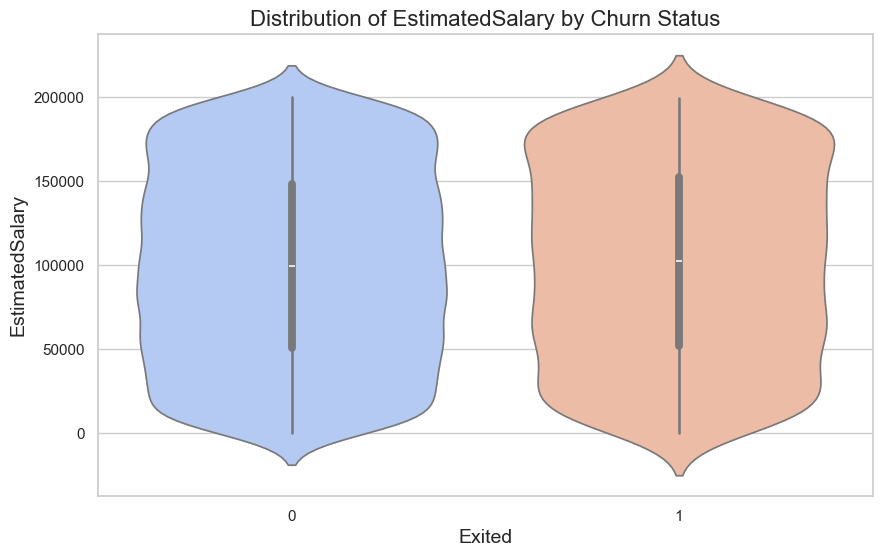

In [48]:
plt.figure(figsize=(12, 8))

# Violin plots for numerical features by churn status
features_to_plot = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Exited', y=feature, data=df, palette='coolwarm')
    plt.title(f'Distribution of {feature} by Churn Status', fontsize=16)
    plt.xlabel('Exited', fontsize=14)
    plt.ylabel(feature, fontsize=14)
    plt.show()

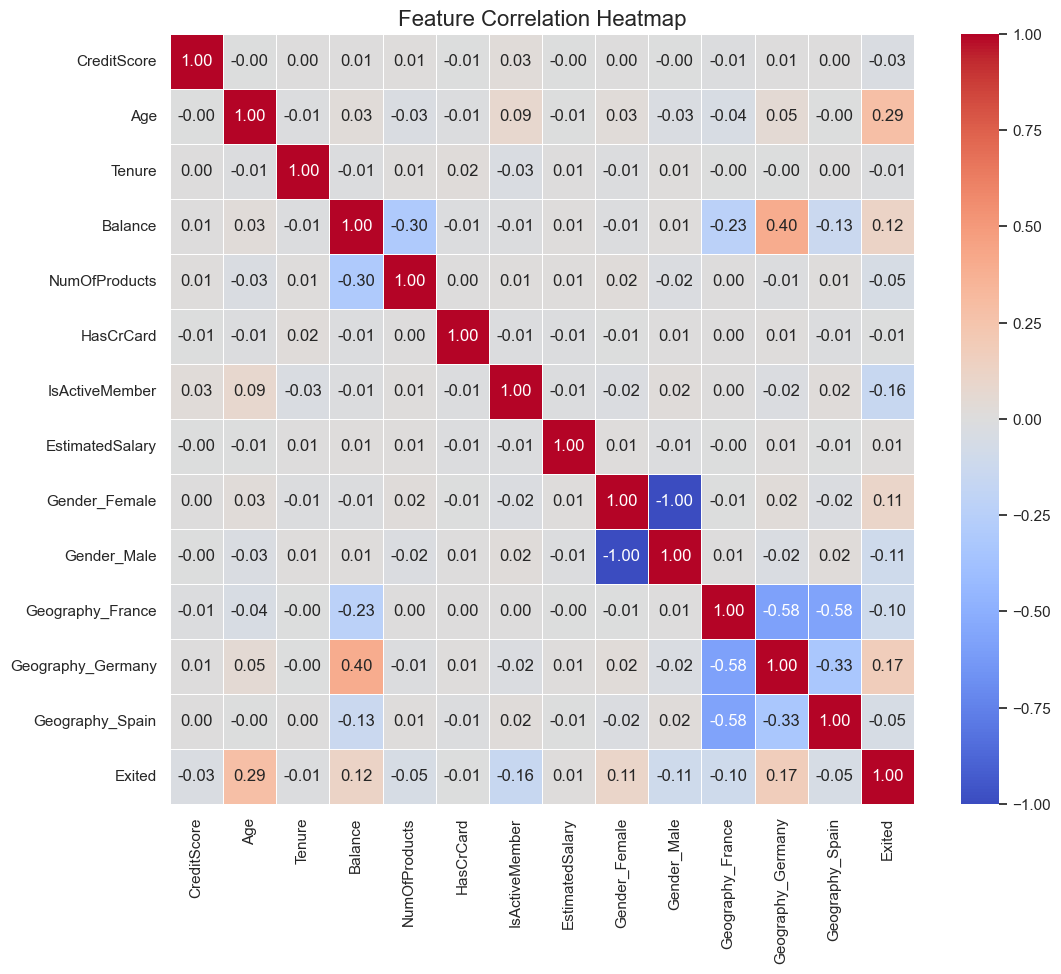

In [49]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Feature Correlation Heatmap', fontsize=16)
plt.show()

<Figure size 1200x800 with 0 Axes>

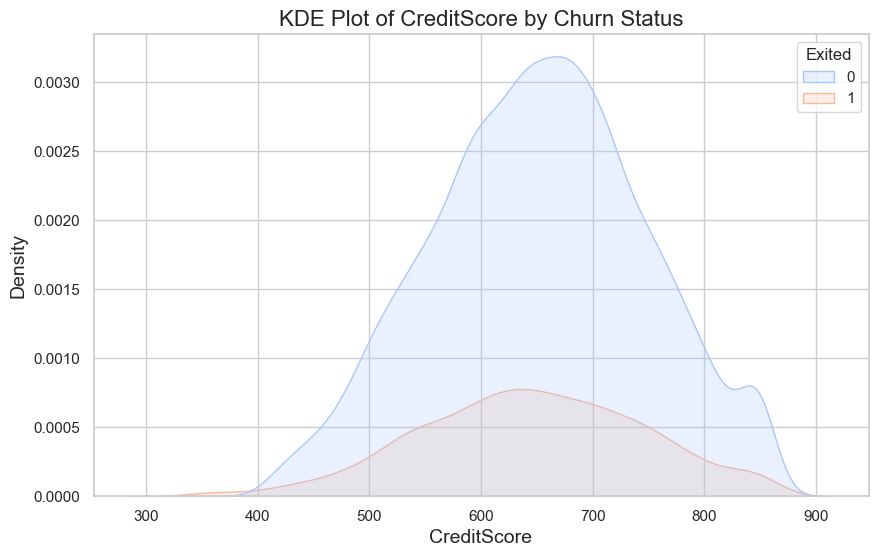

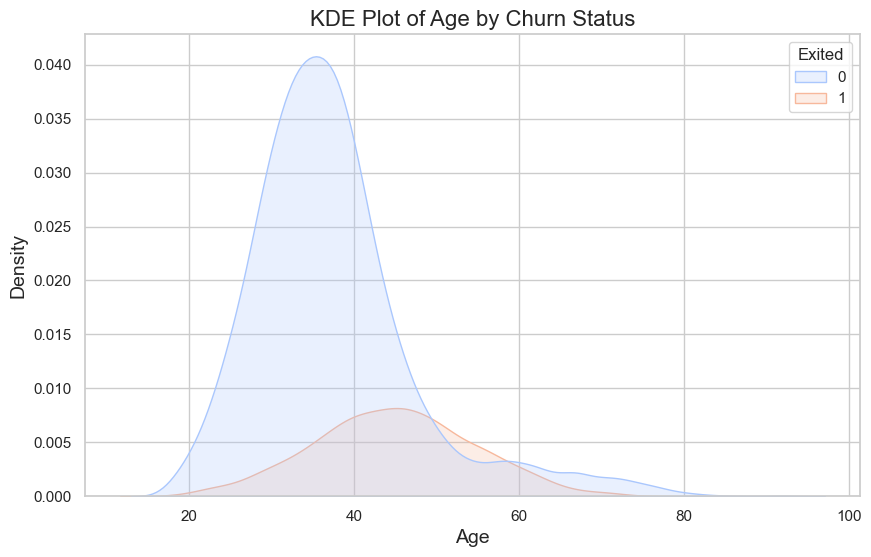

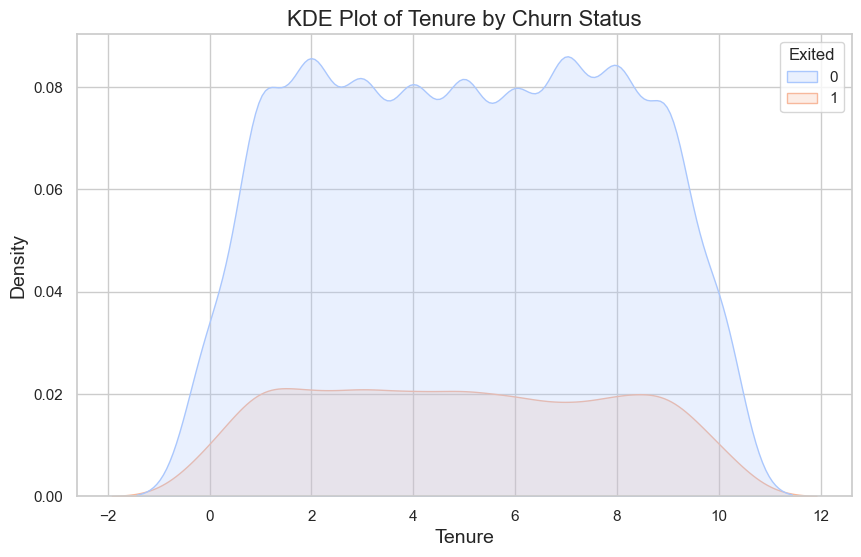

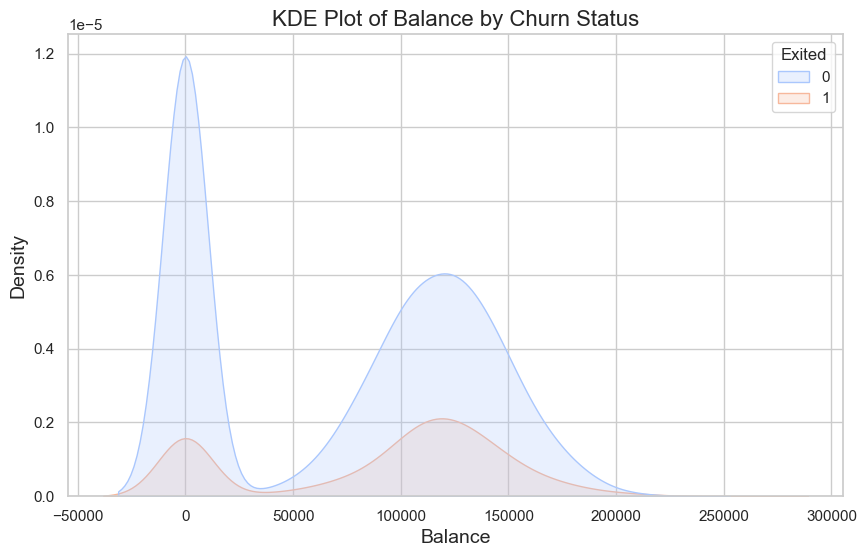

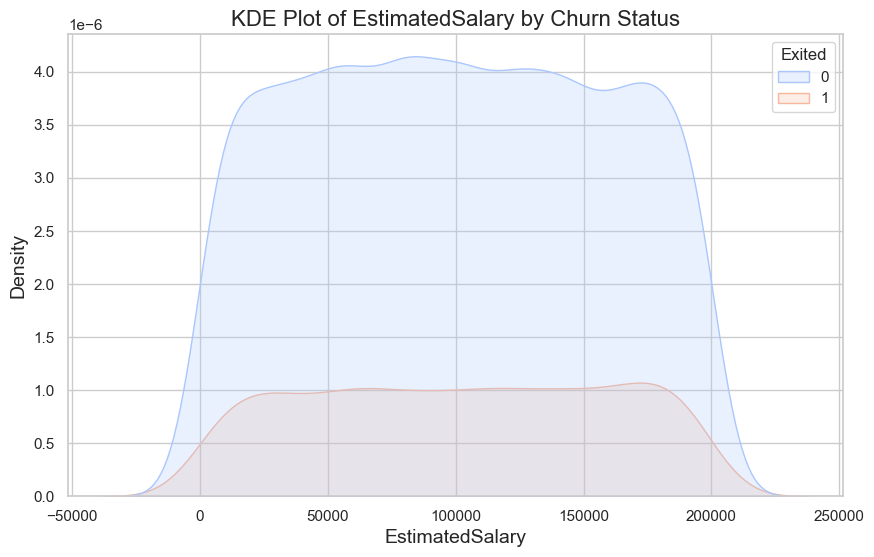

In [50]:
plt.figure(figsize=(12, 8))

# KDE plots for numerical features by churn status
features_to_plot = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x=feature, hue='Exited', fill=True, palette='coolwarm')
    plt.title(f'KDE Plot of {feature} by Churn Status', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.show()

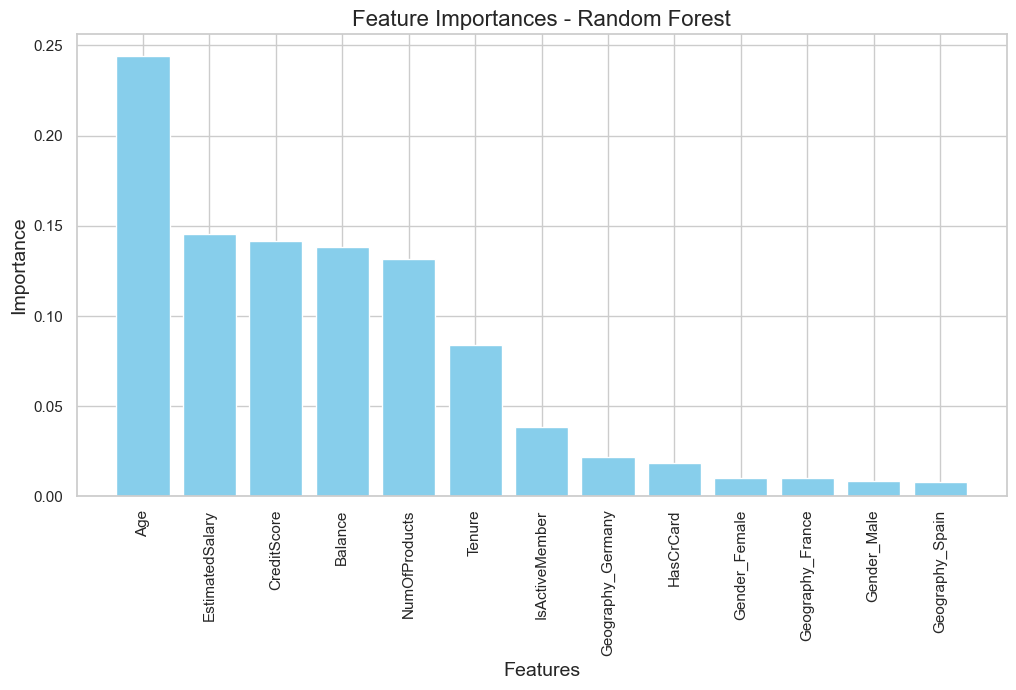

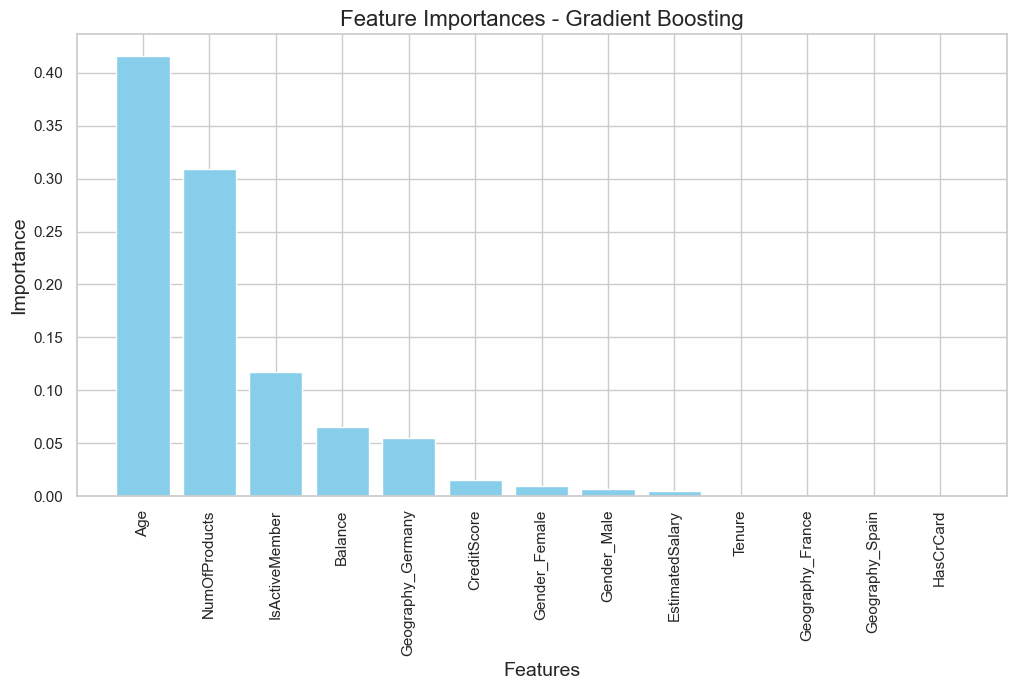

In [51]:
def plot_feature_importances(clf, X, model_name):
    importances = clf.feature_importances_
    indices = importances.argsort()[::-1]
    features = X.columns
    
    plt.figure(figsize=(12, 6))
    plt.title(f'Feature Importances - {model_name}', fontsize=16)
    plt.bar(range(X.shape[1]), importances[indices], align='center', color='skyblue')
    plt.xticks(range(X.shape[1]), features[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.xlabel('Features', fontsize=14)
    plt.ylabel('Importance', fontsize=14)
    plt.show()

# Plot feature importances for Random Forest
plot_feature_importances(rf, pd.DataFrame(X, columns=df.columns[:-1]), 'Random Forest')

# Plot feature importances for Gradient Boosting
plot_feature_importances(gb, pd.DataFrame(X, columns=df.columns[:-1]), 'Gradient Boosting')

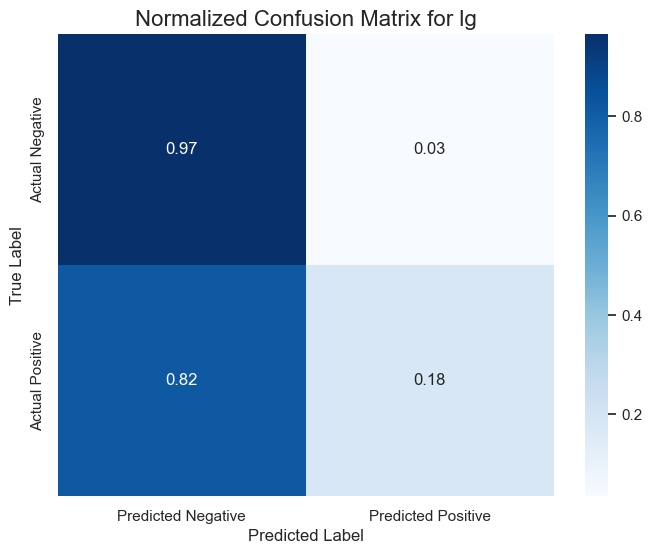

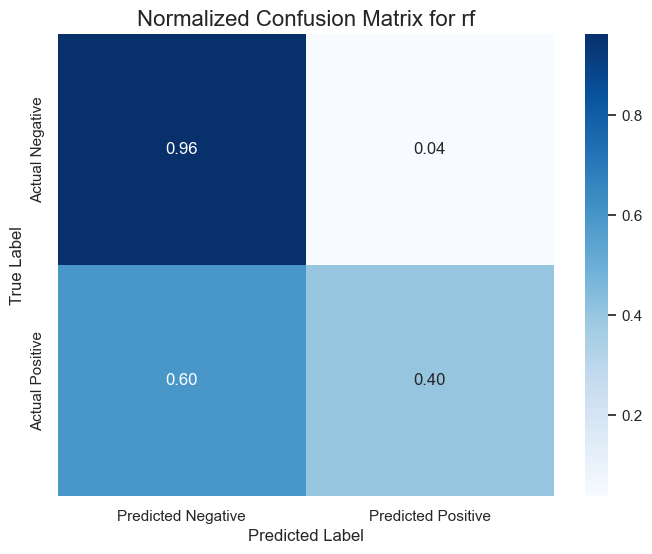

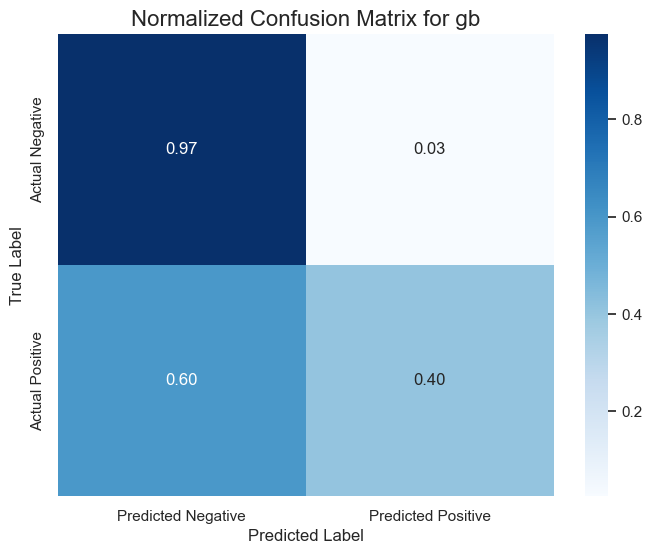

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay

def plot_normalized_confusion_matrix(matrix, classifier):
    matrix_normalized = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix_normalized, annot=True, fmt=".2f", cmap="Blues",
                xticklabels=["Predicted Negative", "Predicted Positive"],
                yticklabels=["Actual Negative", "Actual Positive"])
    plt.title(f"Normalized Confusion Matrix for {classifier}", fontsize=16)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Plot normalized confusion matrices
for i, (matrix, classifier) in enumerate(zip(conf_mat, list(clfs.keys()))):
    plot_normalized_confusion_matrix(matrix, classifier)

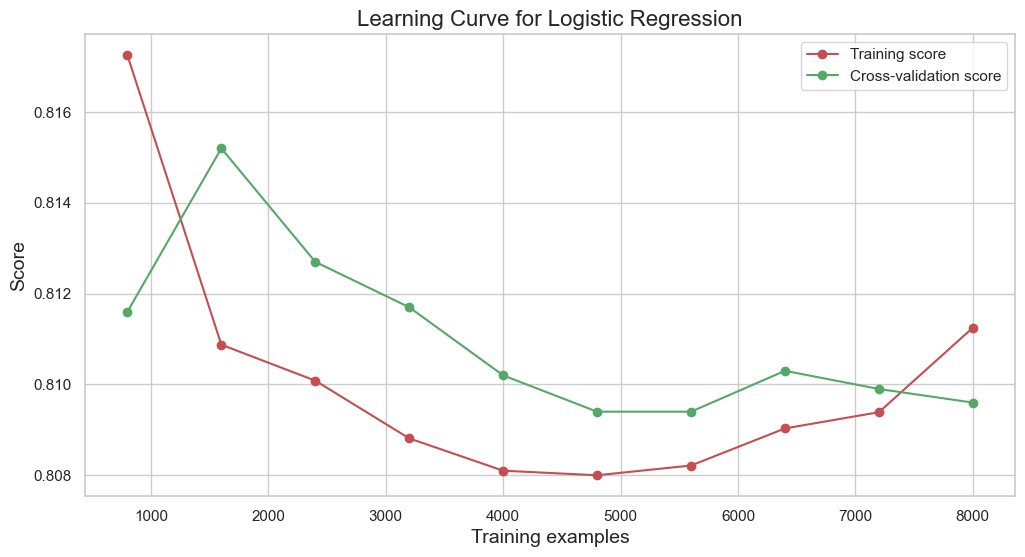

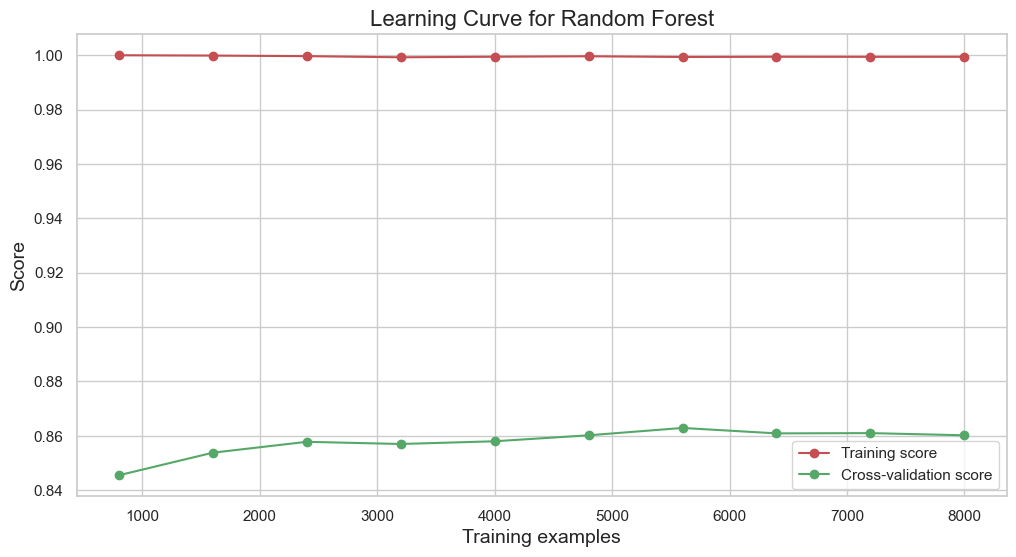

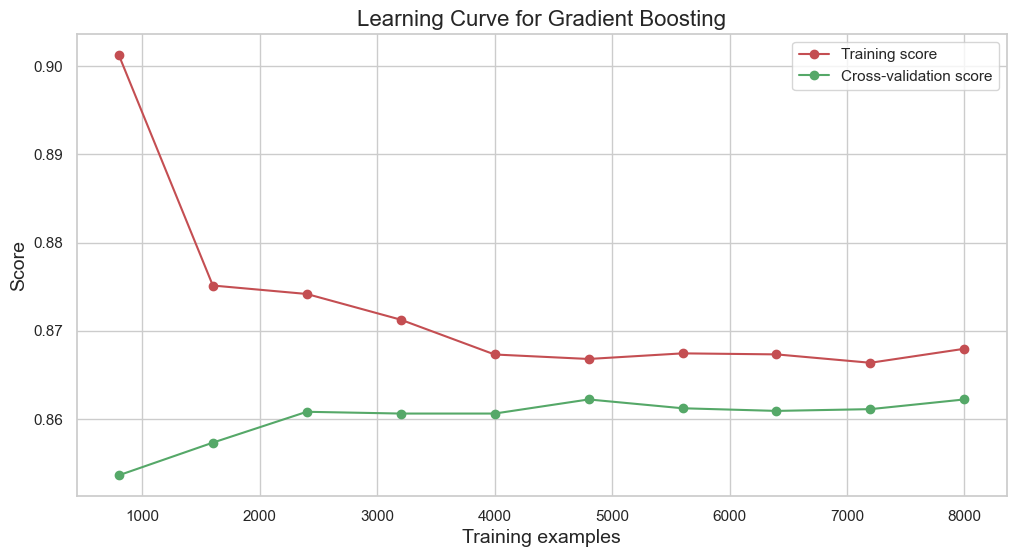

In [53]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(clf, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(clf, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    
    plt.figure(figsize=(12, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Cross-validation score')
    
    plt.title(title, fontsize=16)
    plt.xlabel('Training examples', fontsize=14)
    plt.ylabel('Score', fontsize=14)
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Learning curves for Logistic Regression
plot_learning_curve(lg, X, y, 'Learning Curve for Logistic Regression')

# Learning curves for Random Forest
plot_learning_curve(rf, X, y, 'Learning Curve for Random Forest')

# Learning curves for Gradient Boosting
plot_learning_curve(gb, X, y, 'Learning Curve for Gradient Boosting')

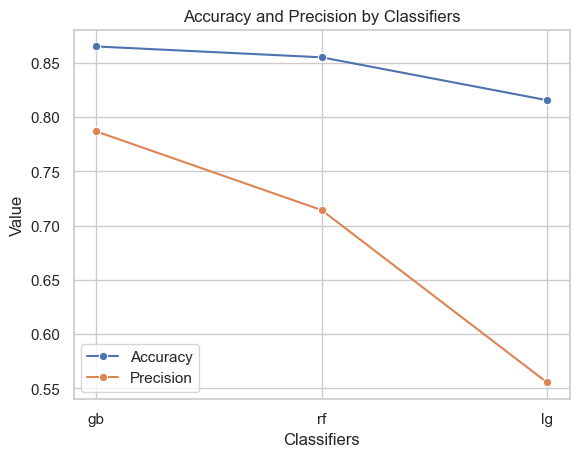

In [46]:
sns.set(style="whitegrid")
sns.lineplot(x=perf_df.classifiers, y=perf_df.accuracy, marker='o', label='Accuracy', data=perf_df)
sns.lineplot(x=perf_df.classifiers, y=perf_df.precision, marker='o', label='Precision', data=perf_df)

plt.title("Accuracy and Precision by Classifiers")
plt.xlabel("Classifiers")
plt.ylabel("Value")
plt.legend()
plt.show()

RESULT
The above plot shows that svc has the best performance with accuracy = 86.5% and precision = 78.68%